# Geofences for dockless shared vehicles
This notebook documents work around creating a listing of polygons within which scooters are required to behave differently, namely disable parking or disuade riding.

## Parks
The first area that we want to look at are parks.  We'll try to use the Overpass API to find all the parks in Portland.  We'll start with finding all the way objects that are tagged as a park.

In [5]:
import overpy
api = overpy.Overpass()
result = api.query("""way["leisure"]["leisure"="park"](45.378437479737,-122.7921295166,45.627484212338,-122.42992401123);out;""")
len(result.ways)

725

Ok, so we have 725 parks to get through.  This only returned the ways object that connects to nodes, which have actual coordinates that we can map and build from.  So let's look at getting the nodes out of a park.  We're going to start by retrieving a known park, Laurelhurst Park, from Overpass

In [6]:
result = api.query("""way(39415016);out;""")
for way in result.ways:
    way.get_nodes(resolve_missing=True)
len(result.nodes)

51

So, we now have some nodes that contain the points that make up the Laurelhurst polygon.  So let's see how we can plot those to take a look.

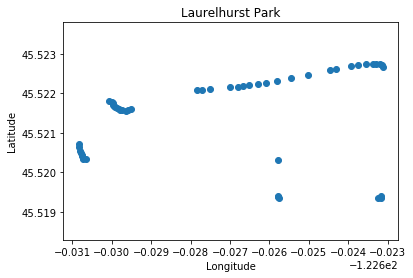

In [11]:
coordinates = []
for node in result.nodes:
    # pull out the coordinates
    coordinates.append((node.lon, node.lat))

import numpy as np
# Convert coordinates into numpy array
X = np.array(coordinates)

import matplotlib.pyplot as plt
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Laurelhurst Park')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

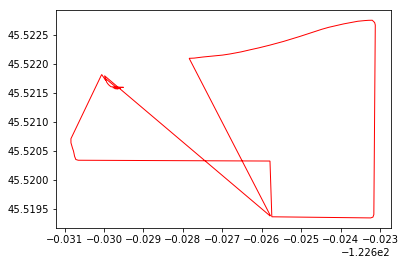

In [24]:
from shapely.geometry.polygon import Polygon
park = Polygon(coordinates)

fig, ax = plt.subplots(1)

from descartes.patch import PolygonPatch
patch = PolygonPatch(park, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(patch)

plt.axis("auto")
plt.show()

Fail

In [26]:
result.nodes

[<overpy.Node id=1433692803 lat=45.5217137 lon=-122.6299571>,
 <overpy.Node id=1433692805 lat=45.5217525 lon=-122.6299762>,
 <overpy.Node id=1564425097 lat=45.5215644 lon=-122.6296392>,
 <overpy.Node id=1564425098 lat=45.5215716 lon=-122.6297275>,
 <overpy.Node id=1564425101 lat=45.5215723 lon=-122.6295762>,
 <overpy.Node id=1564425102 lat=45.5215861 lon=-122.6297792>,
 <overpy.Node id=1564425103 lat=45.5215925 lon=-122.6295055>,
 <overpy.Node id=1564425118 lat=45.5216030 lon=-122.6298222>,
 <overpy.Node id=1564425123 lat=45.5216267 lon=-122.6298668>,
 <overpy.Node id=1564425130 lat=45.5216527 lon=-122.6299022>,
 <overpy.Node id=1564425160 lat=45.5216821 lon=-122.6299323>,
 <overpy.Node id=1564425183 lat=45.5217939 lon=-122.6299881>,
 <overpy.Node id=5597525521 lat=45.5193701 lon=-122.6257868>,
 <overpy.Node id=5597525522 lat=45.5193920 lon=-122.6257946>,
 <overpy.Node id=5597525523 lat=45.5220940 lon=-122.6278420>,
 <overpy.Node id=5597525524 lat=45.5220976 lon=-122.6277165>,
 <overpy

Looks like we got the nodes in order of ID, not in the same order that the way describes them.  So, we need to order them as we use them to make a polygon.

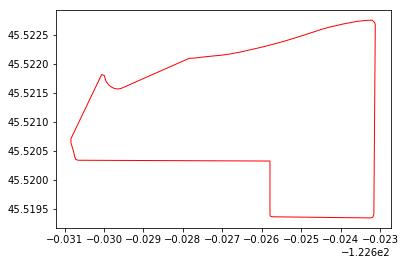

In [30]:
way = result.ways[0]
coordinates = []
for n in way.nodes:
    node = next(x for x in result.nodes if x.id == n.id)
    coordinates.append((node.lon, node.lat))
    
park = Polygon(coordinates)

fig, ax = plt.subplots(1)

patch = PolygonPatch(park, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(patch)

plt.axis("auto")
plt.show()

Sweet